In [1]:
import requests
from bs4 import BeautifulSoup
import pandas as pd

In [13]:
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

%matplotlib inline

In [2]:
base_url = "https://www.airlinequality.com/airline-reviews/british-airways"
pages = 10
page_size = 100

reviews = []

# for i in range(1, pages + 1):
for i in range(1, pages + 1):

    print(f"Scraping page {i}")

    # Create URL to collect links from paginated data
    url = f"{base_url}/page/{i}/?sortby=post_date%3ADesc&pagesize={page_size}"

    # Collect HTML data from this page
    response = requests.get(url)

    # Parse content
    content = response.content
    parsed_content = BeautifulSoup(content, 'html.parser')
    for para in parsed_content.find_all("div", {"class": "text_content"}):
        reviews.append(para.get_text())
    
    print(f"   ---> {len(reviews)} total reviews")

Scraping page 1
   ---> 100 total reviews
Scraping page 2
   ---> 200 total reviews
Scraping page 3
   ---> 300 total reviews
Scraping page 4
   ---> 400 total reviews
Scraping page 5
   ---> 500 total reviews
Scraping page 6
   ---> 600 total reviews
Scraping page 7
   ---> 700 total reviews
Scraping page 8
   ---> 800 total reviews
Scraping page 9
   ---> 900 total reviews
Scraping page 10
   ---> 1000 total reviews


In [6]:
df = pd.DataFrame()
df["reviews"] = reviews
df.head(7)

,reviews
0,Not Verified | We have flown BA five times fr...
1,✅ Trip Verified | London Heathrow to Istanbul...
2,"Not Verified | Jan 30th, I booked a last-minut..."
3,✅ Trip Verified | I am a British Airways Gold ...
4,Not Verified | Another case of reviewing Brit...
5,✅ Trip Verified | On the memorable day of Janu...
6,Not Verified | I did not actually get to fly w...


In [12]:
df.to_csv(r"C:\Users\hi\Desktop\data science\jupyter notebook files\British Airways internship\DataBA_reviews.csv", index=False)

# Exploratory data analysis

In [18]:
df = pd.read_csv("customer_booking.csv", encoding="ISO-8859-1")

In [19]:
df.head()

,num_passengers,sales_channel,trip_type,purchase_lead,length_of_stay,flight_hour,flight_day,route,booking_origin,wants_extra_baggage,wants_preferred_seat,wants_in_flight_meals,flight_duration,booking_complete
0,2,Internet,RoundTrip,262,19,7,Sat,AKLDEL,New Zealand,1,0,0,5.52,0
1,1,Internet,RoundTrip,112,20,3,Sat,AKLDEL,New Zealand,0,0,0,5.52,0
2,2,Internet,RoundTrip,243,22,17,Wed,AKLDEL,India,1,1,0,5.52,0
3,1,Internet,RoundTrip,96,31,4,Sat,AKLDEL,New Zealand,0,0,1,5.52,0
4,2,Internet,RoundTrip,68,22,15,Wed,AKLDEL,India,1,0,1,5.52,0


In [21]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 50000 entries, 0 to 49999
Data columns (total 14 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   num_passengers         50000 non-null  int64  
 1   sales_channel          50000 non-null  object 
 2   trip_type              50000 non-null  object 
 3   purchase_lead          50000 non-null  int64  
 4   length_of_stay         50000 non-null  int64  
 5   flight_hour            50000 non-null  int64  
 6   flight_day             50000 non-null  object 
 7   route                  50000 non-null  object 
 8   booking_origin         50000 non-null  object 
 9   wants_extra_baggage    50000 non-null  int64  
 10  wants_preferred_seat   50000 non-null  int64  
 11  wants_in_flight_meals  50000 non-null  int64  
 12  flight_duration        50000 non-null  float64
 13  booking_complete       50000 non-null  int64  
dtypes: float64(1), int64(8), object(5)
memory usage: 5.3+ 

In [22]:
df['flight_day'].unique()

array(['Sat', 'Wed', 'Thu', 'Mon', 'Sun', 'Tue', 'Fri'], dtype=object)

In [23]:
df['sales_channel'].unique()

array(['Internet', 'Mobile'], dtype=object)

In [26]:
df['trip_type'].unique()

array(['RoundTrip', 'CircleTrip', 'OneWay'], dtype=object)

In [53]:
df['sales_channel'].unique()

array(['Internet', 'Mobile'], dtype=object)

Mapping the  Flight Day

In [28]:
mapping={'Sat':1,
         'Wed':5,
         'Thu':6,
         'Mon':3,
         'Sun':2,
         'Tue':4,
         'Fri':7
        }
df["flight_day"] = df["flight_day"].map(mapping)

In [77]:
df.head()

,num_passengers,purchase_lead,length_of_stay,flight_hour,flight_day,wants_extra_baggage,wants_preferred_seat,wants_in_flight_meals,flight_duration,booking_complete,Mobile,OneWay,RoundTrip
0,2,262,19,7,1,1,0,0,5.52,0,0,0,1
1,1,112,20,3,1,0,0,0,5.52,0,0,0,1
2,2,243,22,17,5,1,1,0,5.52,0,0,0,1
3,1,96,31,4,1,0,0,1,5.52,0,0,0,1
4,2,68,22,15,5,1,0,1,5.52,0,0,0,1


In [30]:
df['flight_day'].value_counts()

3    8102
5    7674
4    7673
6    7424
7    6761
2    6554
1    5812
Name: flight_day, dtype: int64

<Axes: xlabel='booking_complete', ylabel='count'>

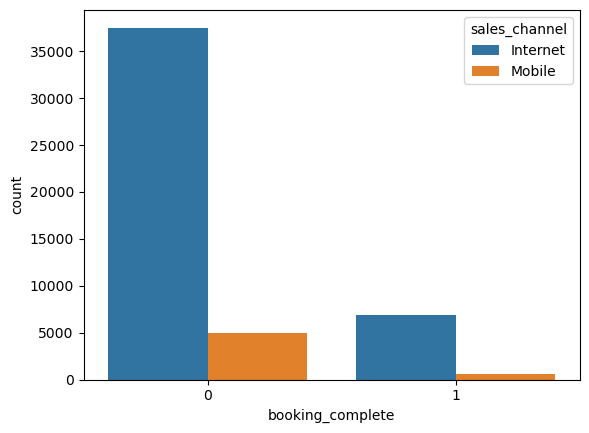

In [34]:
sns.countplot(df,x='booking_complete',hue='sales_channel')

<Axes: xlabel='sales_channel', ylabel='count'>

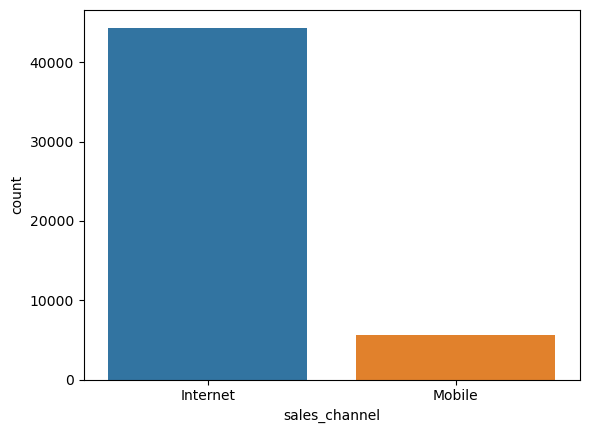

In [35]:
sns.countplot(df,x='sales_channel')

<Axes: xlabel='flight_hour', ylabel='count'>

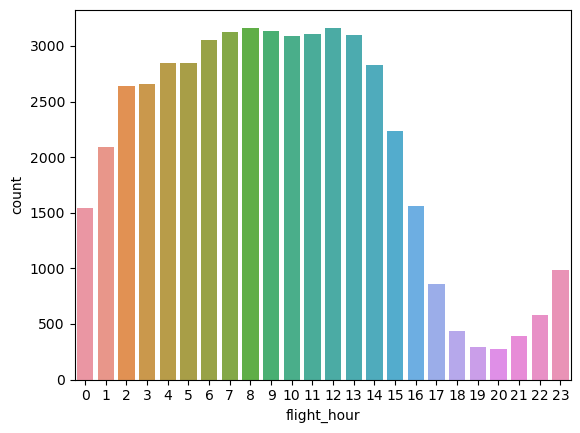

In [37]:
sns.countplot(df,x='flight_hour')

C:\Users\hi\AppData\Local\Temp\ipykernel_5932\511428505.py:2: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  sns.heatmap(df.corr(),annot=True)


<Axes: >

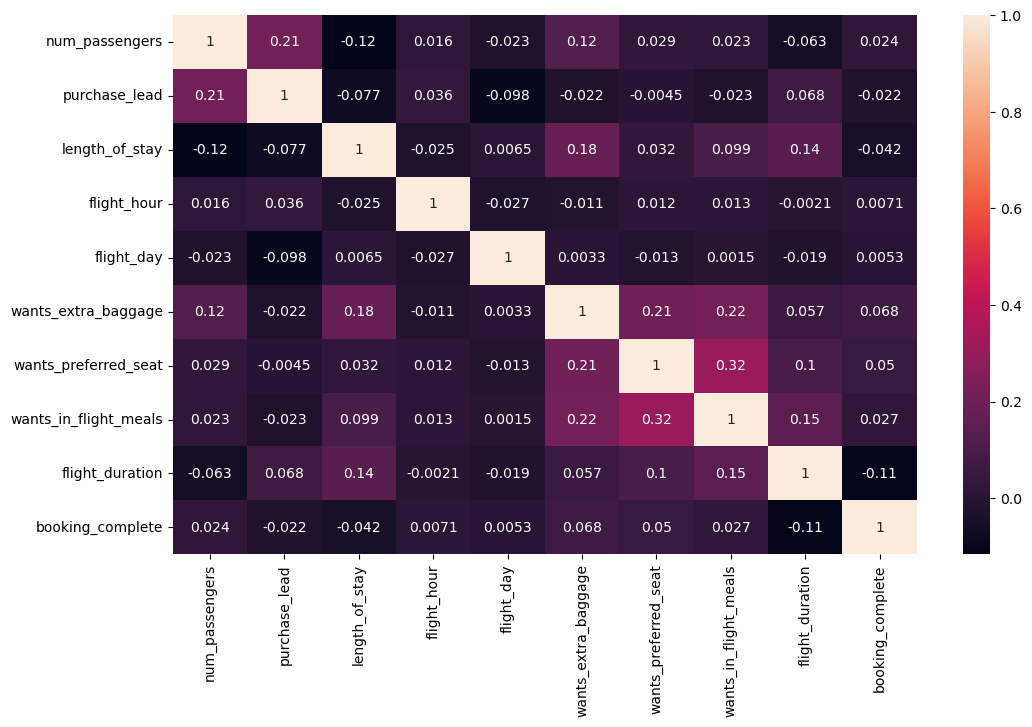

In [43]:
plt.figure(figsize=(12,7))
sns.heatmap(df.corr(),annot=True)

#  dealing with non numerical column and get dummi variable

In [54]:
dummies= pd.get_dummies(df['sales_channel'],drop_first=True)

In [55]:
df= pd.concat([df.drop('sales_channel',axis=1),dummies],axis=1)

In [56]:
dummies= pd.get_dummies(df['trip_type'],drop_first=True)

In [57]:
df=pd.concat([df.drop('trip_type',axis=1),dummies],axis=1)

In [58]:
df.head()

,num_passengers,purchase_lead,length_of_stay,flight_hour,flight_day,route,booking_origin,wants_extra_baggage,wants_preferred_seat,wants_in_flight_meals,flight_duration,booking_complete,Mobile,OneWay,RoundTrip
0,2,262,19,7,1,AKLDEL,New Zealand,1,0,0,5.52,0,0,0,1
1,1,112,20,3,1,AKLDEL,New Zealand,0,0,0,5.52,0,0,0,1
2,2,243,22,17,5,AKLDEL,India,1,1,0,5.52,0,0,0,1
3,1,96,31,4,1,AKLDEL,New Zealand,0,0,1,5.52,0,0,0,1
4,2,68,22,15,5,AKLDEL,India,1,0,1,5.52,0,0,0,1


In [66]:
df['booking_origin'].value_counts()

Australia               17872
Malaysia                 7174
South Korea              4559
Japan                    3885
China                    3387
                        ...  
Panama                      1
Tonga                       1
Tanzania                    1
Bulgaria                    1
Svalbard & Jan Mayen        1
Name: booking_origin, Length: 104, dtype: int64

In [ ]:
 df.head()

# we will use classification model to predict our data

In [79]:
from sklearn.model_selection import train_test_split

In [80]:
X=df.drop('booking_complete',axis=1)
y=df['booking_complete']

In [81]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=101)

In [82]:
from sklearn.linear_model import LinearRegression

In [83]:
lr=LinearRegression()

In [84]:
lr.fit(X_train,y_train)

LinearRegression()

In [85]:
predictions=lr.predict(X_test)

# model evaluation 

In [87]:
from sklearn.metrics import mean_squared_error, r2_score, mean_absolute_error

# X_test: Features of the test set
# y_test: Actual target values for the test set
# y_pred: Predicted values from your linear regression model

# Mean Squared Error (MSE)
mse = mean_squared_error(y_test, predictions)
print(f"Mean Squared Error (MSE): {mse}")

Mean Squared Error (MSE): 0.12228952706982539


In [89]:
# R-squared (R²)
r2 = r2_score(y_test, predictions)
print(f"R-squared (R²): {r2}")

# Mean Absolute Error (MAE)
mae = mean_absolute_error(y_test, predictions)
print(f"Mean Absolute Error (MAE): {mae}")

R-squared (R²): 0.02179476843318129
Mean Absolute Error (MAE): 0.24754360997826821


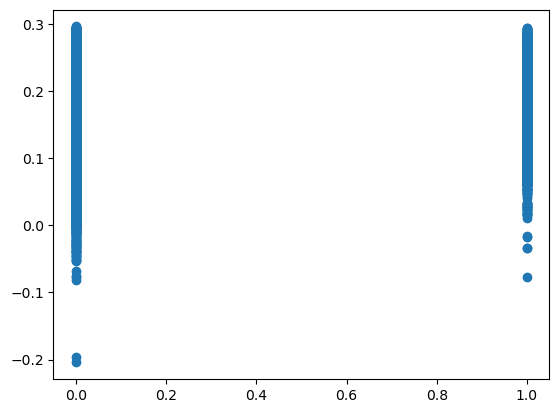

In [92]:
plt.scatter(y_test,predictions)

C:\Users\hi\AppData\Local\Temp\ipykernel_5932\3356055679.py:1: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot((y_test,predictions))


<Axes: ylabel='Density'>

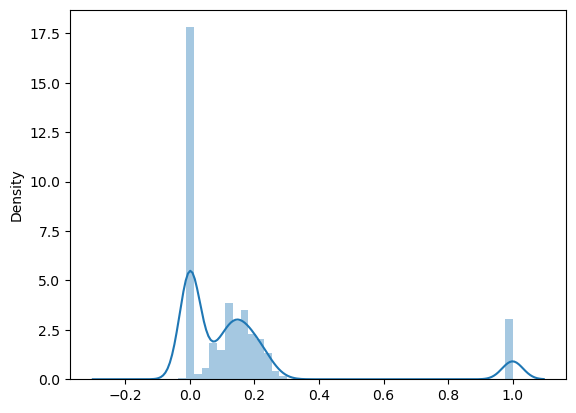

In [94]:
sns.distplot((y_test,predictions))

#  features importance

In [95]:
# Retrieve the coefficients and corresponding feature names
coefficients = lr.coef_
feature_names = X_train.columns

In [96]:
# Create a DataFrame to display the coefficients and feature names
feature_importance_df = pd.DataFrame({'Feature': feature_names, 'Coefficient': coefficients})

In [100]:
# Sort the DataFrame by absolute coefficient values to show the most important features
feature_importance_df['Absolute_Coefficient'] = abs(feature_importance_df['Coefficient'])
feature_importance_df = feature_importance_df.sort_values(by='Absolute_Coefficient', ascending=False)

# Display the feature importance DataFrame
print(feature_importance_df)

                  Feature  Coefficient  Absolute_Coefficient
11              RoundTrip     0.095453              0.095453
5     wants_extra_baggage     0.054554              0.054554
9                  Mobile    -0.047986              0.047986
6    wants_preferred_seat     0.036174              0.036174
8         flight_duration    -0.026895              0.026895
7   wants_in_flight_meals     0.009048              0.009048
10                 OneWay    -0.007041              0.007041
0          num_passengers     0.000969              0.000969
4              flight_day     0.000849              0.000849
3             flight_hour     0.000513              0.000513
2          length_of_stay    -0.000452              0.000452
1           purchase_lead    -0.000066              0.000066


([0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11],
 [Text(0, 0, 'RoundTrip'),
  Text(1, 0, 'wants_extra_baggage'),
  Text(2, 0, 'Mobile'),
  Text(3, 0, 'wants_preferred_seat'),
  Text(4, 0, 'flight_duration'),
  Text(5, 0, 'wants_in_flight_meals'),
  Text(6, 0, 'OneWay'),
  Text(7, 0, 'num_passengers'),
  Text(8, 0, 'flight_day'),
  Text(9, 0, 'flight_hour'),
  Text(10, 0, 'length_of_stay'),
  Text(11, 0, 'purchase_lead')])

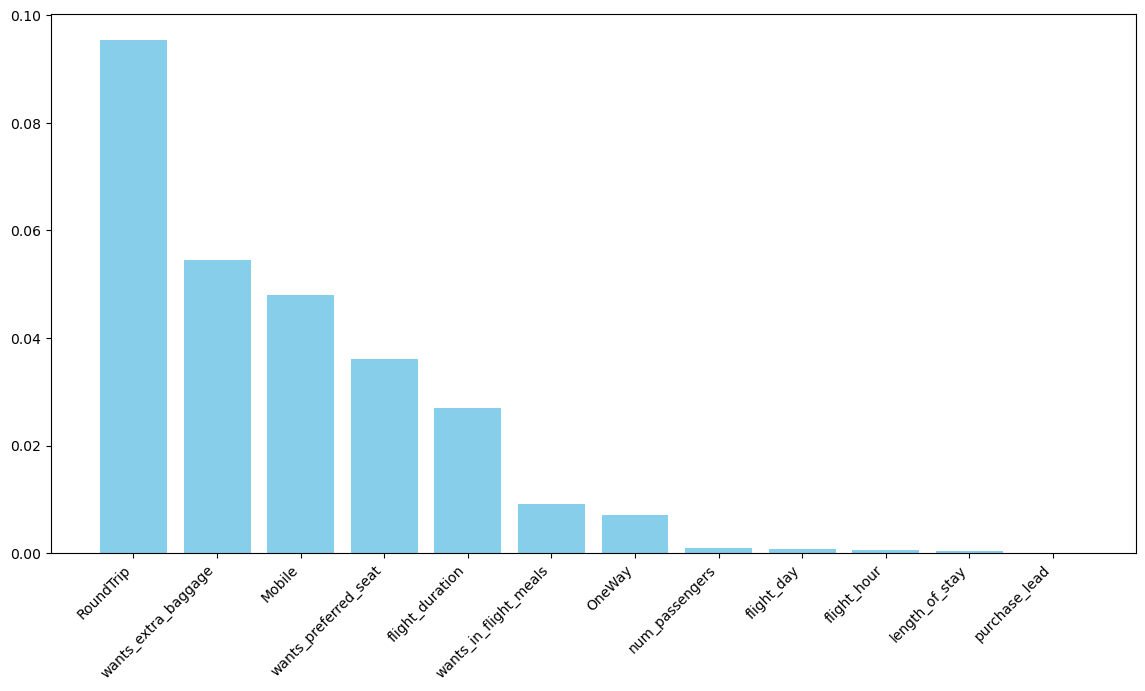

In [104]:
# Create a bar plot for feature importance
plt.figure(figsize=(14, 7))
plt.bar(feature_importance_df['Feature'], feature_importance_df['Absolute_Coefficient'], color='skyblue')

# Adjust x-axis labels for better visibility
plt.xticks(rotation=45, ha='right', fontsize=10)  # Rotate x-axis labels and set font size